# Chapter 8: Support Vector Machines and Kernel Methods

This notebook provides practical "recipes" for tree-base algorithms and  ensemble methods. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls when applicable. 

## Introduction to Decision Trees
Decision trees are powerful and, compared to other ML techniques, intuitive models used for classification and regression tasks. They work by recursively splitting data based on feature values, creating a tree-like structure composed of nodes and branches. Each internal node represents a “decision” based on a feature, while “leaf nodes” represent the predicted outcome. Decision trees are popular due to their interpretability and effectiveness in handling both numerical and categorical data. Even though they are relatively easy to understand, they are still powerful and can often outperform more complex models, so don’t dismiss them from your ML arsenal!.

### Getting ready
First, we need to prepare our environment and dataset.

In [1]:
# Load libraries 
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it
We can now build our decision tree classifier, train it, and evaluate its performance.

In [2]:
# Instantiate the model
clf = DecisionTreeClassifier(random_state=2024)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Generate predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Create a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Stylize the DataFrame
styled_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

styled_df

,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.714,0.833,0.769,12
2,0.846,0.733,0.786,15
accuracy,0.867,0.867,0.867,1
macro avg,0.853,0.856,0.852,45
weighted avg,0.873,0.867,0.867,45


### How it works
Decision trees work by splitting the dataset based on feature values. The goal at each split is to increase homogeneity, or “sameness,” within each subgroup. The decision to split is typically determined by criteria like Gini impurity (used by default in scikit-learn) or entropy.
We can visualize the decision tree to better understand how splits were made:

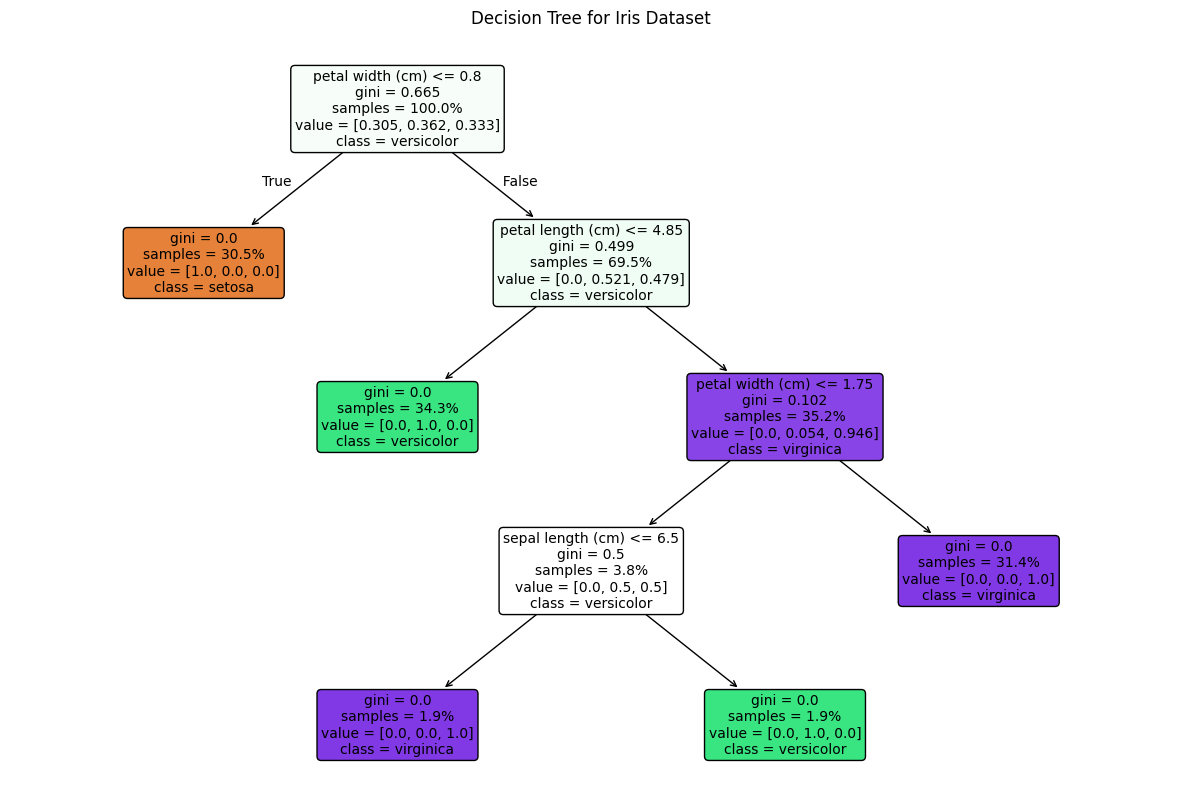

In [3]:
# Load the libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the figure
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, proportion=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Iris Dataset")
plt.show()

## Random Forests and Bagging
While building a single decision tree model is intuitive, most real-world applications will only use them as part of an ensemble method due to some of their shortcomings – especially in overfitting. As the saying goes, “two heads (or trees in this case) are better than one!” 

### Getting ready
We will utilize scikit-learn to demonstrate building a random forest classifier.

In [4]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it
We will now build, train, and evaluate our random forest classifier.

In [5]:
# Instantiate the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2024)

# Fit the model to the training data
rf_clf.fit(X_train, y_train)

# Generate predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Stylize the DataFrame
styled_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

styled_df

,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.833,0.833,0.833,12
2,0.867,0.867,0.867,15
accuracy,0.911,0.911,0.911,1
macro avg,0.900,0.900,0.900,45
weighted avg,0.911,0.911,0.911,45


Random forests construct multiple decision trees, each trained on “bootstrapped” samples of the dataset. Additionally, at each “split” in a tree, a random subset of features is considered, introducing further diversity. This approach reduces variance and increases model stability and generalization which is designed to allow it to work with unseen data it might encounter in a production application.

Let's visualize feature importance to understand which features contributed most to the decision-making process:


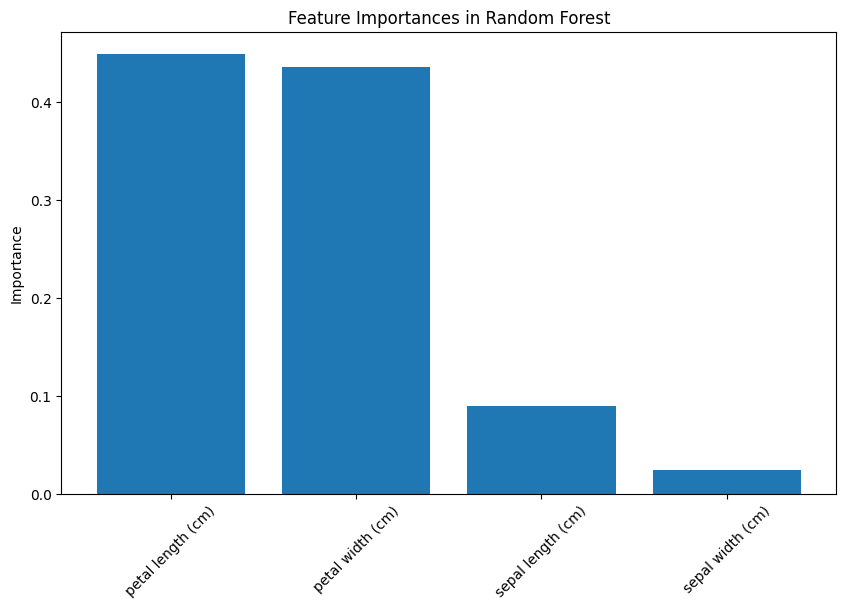

In [6]:
# Load the libraries
import matplotlib.pyplot as plt

# Calculate feature importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10,6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [iris.feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.show()

## Gradient Boosted Machines
Gradient boosting machines (GBMs) are advanced ensemble techniques that sequentially build and combine “weak” prediction models, typically decision trees, to produce a stronger predictive performance. Unlike random forests, GBMs construct trees one at a time, each aiming to minimize errors from previous models. Another way to think about this is while random forests build a collection of decision trees in parallel, GBMs build them sequentially. This is where the term “boosting” comes from: we try to “boost” the predictive performance of each successive tree. This iterative approach can significantly enhance accuracy, making GBMs highly effective for various machine learning tasks.

### Getting ready
We will use scikit-learn to illustrate how to create a gradient boosting classifier.

In [7]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
	
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it...
Now, let's build and evaluate our gradient boosting model.

In [8]:
# Instantiate the model
gbm_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.2, random_state=2024)

# Fit the model to the training data
gbm_clf.fit(X_train, y_train)

# Generate predictions
y_pred = gbm_clf.predict(X_test)

# Evaluate the model
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Stylize the DataFrame
styled_df = (report
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
styled_df


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.714,0.833,0.769,12
2,0.846,0.733,0.786,15
accuracy,0.867,0.867,0.867,1
macro avg,0.853,0.856,0.852,45
weighted avg,0.873,0.867,0.867,45


### How it works...
GBMs work by iteratively building new models that predict the residuals (errors) of previous models. Each new model aims to minimize these residuals, gradually refining the overall prediction accuracy.

## Hyperparameter Tuning for Trees and Ensembles
As we’ve well-learned by now, hyperparameter tuning is essential for optimizing the performance of models and ensembles, including decision trees, random forests, and GBMs. By carefully selecting hyperparameters such as maximum tree depth, number of estimators, and learning rates, we can significantly enhance model performance and prevent overfitting. We will utilize the same tools (only the hyperparameters themselves will be specific to these model types) we used previously in scikit-learn, like grid search and cross-validation, to systematically tune our models.

### Getting ready
We'll demonstrate hyperparameter tuning using scikit-learn's GridSearchCV() with a gradient boosting classifier.

In [9]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it...
We'll now use grid search combined with cross-validation to find the best hyperparameters for our gradient boosting model.


In [10]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV()
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=2024),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit GridSearchCV() to training data
grid_search.fit(X_train, y_train)

# Identify the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate classification report
report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Stylize the DataFrame
styled_df = (report
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

styled_df


Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.714,0.833,0.769,12
2,0.846,0.733,0.786,15
accuracy,0.867,0.867,0.867,1
macro avg,0.853,0.856,0.852,45
weighted avg,0.873,0.867,0.867,45


## How it works...
Grid search exhaustively tests combinations of specified hyperparameters, using cross-validation to evaluate each set's performance. The model achieving the best cross-validation score is then selected as the “optimal” configuration. Cross-validation ensures reliable performance estimates by evaluating each hyperparameter configuration across multiple subsets of the dataset which is our way of trying to simulate the nuances our model might “see” when performing “in the wild.”

We can visualize the results to better understand the effect of different hyperparameters:

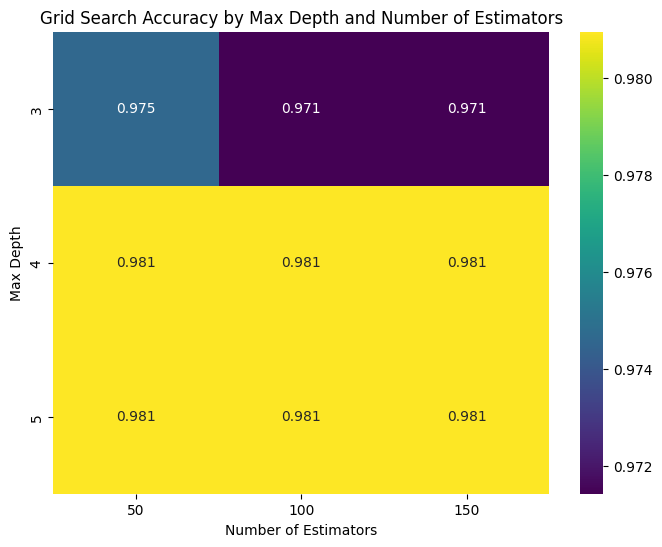

In [11]:
# Load the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table
results = pd.DataFrame(grid_search.cv_results_)
pivot_table = results.pivot_table(values='mean_test_score', 
                                  index='param_max_depth', 
                                  columns='param_n_estimators')

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis')
plt.title('Grid Search Accuracy by Max Depth and Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()


## Comparing Ensemble Methods
Comparing ensemble methods helps us recognize the relative strengths and weaknesses of approaches like bagging, boosting, and stacking (which we’ll look at below). Each method has unique characteristics—bagging reduces variance, boosting reduces bias, and stacking leverages multiple algorithms to enhance predictive performance. Through comparative experiments on various datasets, we can determine which ensemble strategy works best for specific problems.

### Getting ready
We'll demonstrate comparing different ensemble methods using scikit-learn with a classification dataset.

In [12]:
# Load the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it...
We'll build and evaluate bagging (random forests), boosting (gradient boosting), and stacking classifiers.

In [13]:
# Instantiate models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=2024)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=2024)
stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf)],
    final_estimator=LogisticRegression(),
    cv=5
)
# Fit the models
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
stacking_clf.fit(X_train, y_train)

# Generate predictions
rf_pred = rf_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
stacking_pred = stacking_clf.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
stacking_accuracy = accuracy_score(y_test, stacking_pred)

# Print the accuracy scores
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Gradient Boosting Accuracy: {gb_accuracy:.2f}')
print(f'Stacking Accuracy: {stacking_accuracy:.2f}')


Random Forest Accuracy: 0.91
Gradient Boosting Accuracy: 0.87
Stacking Accuracy: 0.87


### How it works...
Bagging (with random forests) averages predictions from multiple trees built on bootstrapped datasets, reducing variance. Boosting (with GBMs) sequentially builds trees to correct errors from previous models, focusing on reducing bias. Stacking, on the other hand, combines multiple base models using a “meta-model” to enhance predictive performance further.

We can visualize the comparative results clearly:

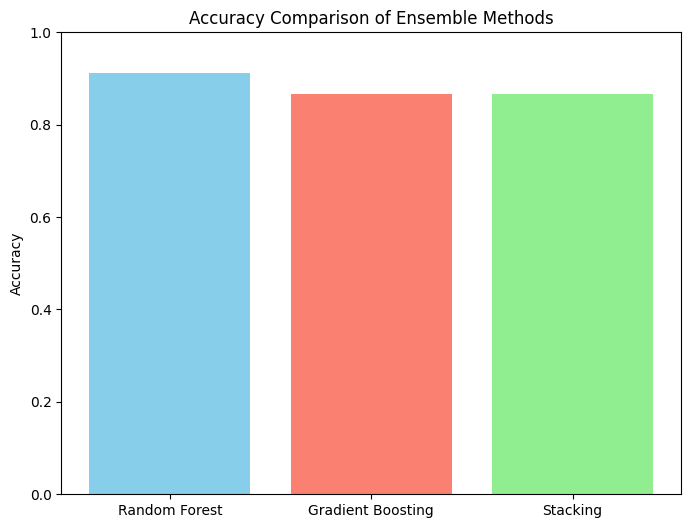

In [14]:
# Load the libraries
import matplotlib.pyplot as plt

# Create a bar plot
methods = ['Random Forest', 'Gradient Boosting', 'Stacking']
accuracies = [rf_accuracy, gb_accuracy, stacking_accuracy]

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(methods, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Accuracy Comparison of Ensemble Methods')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


## Practical Exercises with Tree-Based Models
In this final section, we will engage in practical exercises that involve building, tuning, and evaluating tree-based and ensemble models on real-world datasets. These exercises are designed to reinforce the concepts learned throughout the chapter and demonstrate how to effectively apply these models in complex machine learning scenarios. By the end of this section, we will have hands-on experience that we can leverage in our own ML projects.

### Exercise 1: Building and Evaluating a Decision Tree Classifier
In this exercise, we'll build and evaluate a basic decision tree classifier.


In [15]:
# Load libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train the classifier
YOUR CODE HERE

# Make predictions
YOUR CODE HERE

#Evaluate performance
YOUR CODE HERE

SyntaxError: invalid syntax (4026926192.py, line 2)

### Exercise 2: Hyperparameter Tuning with Random Forests
We'll fine-tune a random forest classifier using grid search to find the optimal parameters.

In [ ]:
# Load libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Define hyperparameter grid and perform grid search
YOUR CODE HERE

# Evaluate the best model
YOUR CODE HERE

### Exercise 3: Comparing Gradient Boosting and Random Forest
We'll compare the performance of gradient boosting and random forest classifiers on a classification dataset.

In [ ]:
# Load libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train models
YOUR CODE HERE

# Make predictions and evaluate
YOUR CODE HERE